# PCA Step by Step

To better understand PCA we will use a sample of MLB playes and their respectives Stats

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bat = pd.read_csv('bat_sample.csv')
bat.head()

,name,team_name,slg_percent,on_base_percent,sprint_speed
0,"Batten, Matthew",SD,0.358,0.355,28.6
1,"Rosario, Eddie",ATL,0.450,0.305,27.9
2,"Suwinski, Jack",PIT,0.454,0.339,28.6
3,"Sosa, Lenyn",CWS,0.348,0.224,27.6
4,"Trammell, Taylor",SEA,0.326,0.286,27.1


In [20]:
bat.shape

(98, 5)

<Axes: xlabel='slg_percent', ylabel='on_base_percent'>

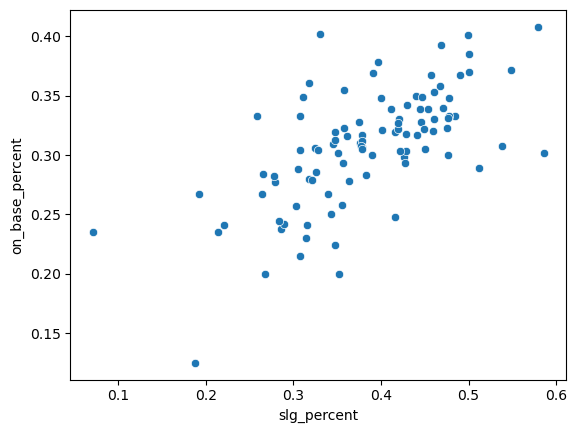

In [3]:
sns.scatterplot(x='slg_percent',y='on_base_percent', data = bat)

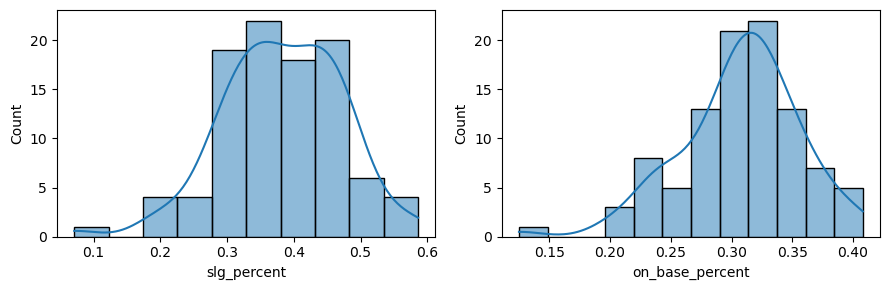

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(9,3))
axes=axes.flatten()                                      
sns.histplot(data=bat['slg_percent'],ax=axes[0], kde=True)
sns.histplot(data=bat['on_base_percent'],ax=axes[1], kde=True)
plt.tight_layout()

In [5]:
bat['slg_percent'].mean()

0.38283673469387763

<Axes: xlabel='slg_percent', ylabel='on_base_percent'>

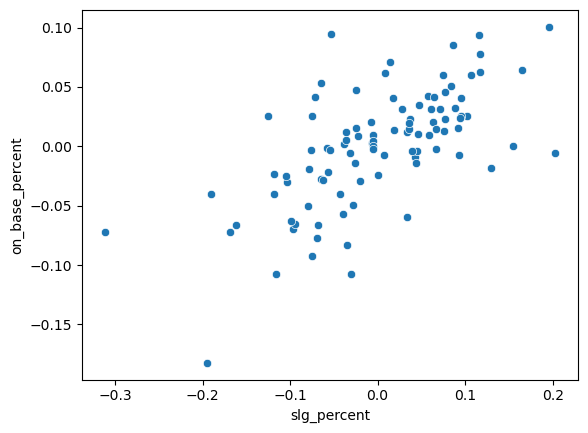

In [6]:
bat['slg_percent'] = bat['slg_percent']-bat['slg_percent'].mean()
bat['on_base_percent'] = bat['on_base_percent']-bat['on_base_percent'].mean()
sns.scatterplot(x='slg_percent',y='on_base_percent', data = bat)

In [7]:
bat[['slg_percent','on_base_percent']]

,slg_percent,on_base_percent
0,-0.024837,0.047653
1,0.067163,-0.002347
2,0.071163,0.031653
3,-0.034837,-0.083347
4,-0.056837,-0.021347
...,...,...
93,-0.030837,-0.107347
94,0.036163,0.019653
95,-0.054837,-0.003347
96,0.095163,0.040653


In [9]:
B = np.array(bat[['slg_percent','on_base_percent']])
cov_m = np.matmul(B.T,B)/(len(B)-1)
cov_m

array([[0.00792121, 0.00277277],
       [0.00277277, 0.00237262]])

In [10]:
np.cov(B[:,0],B[:,1])

array([[0.00792121, 0.00277277],
       [0.00277277, 0.00237262]])

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(cov_m)
print("Eigenvalues: \n", eigenvalues)
print("Eigenvectors: \n", eigenvectors)


Eigenvalues: 
 [0.00906928 0.00122455]
Eigenvectors: 
 [[ 0.92393217 -0.38255633]
 [ 0.38255633  0.92393217]]


In [12]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
print("Eigenvalues: \n", eigenvalues)
print("Eigenvectors: \n", eigenvectors)

Eigenvalues: 
 [0.00906928 0.00122455]
Eigenvectors: 
 [[ 0.92393217 -0.38255633]
 [ 0.38255633  0.92393217]]


In [13]:
k=2
principal_components = eigenvectors[:, :k]

In [14]:
transformed_B = np.dot(B, principal_components)

In [15]:
transformed_B

array([[-4.71747780e-03,  5.35296463e-02],
       [ 6.11564651e-02, -2.78621447e-02],
       [ 7.78591091e-02,  2.02132370e-03],
       [-6.40716791e-02, -6.36799044e-02],
       [-6.06796942e-02,  2.02012935e-03],
       [-2.93599026e-02, -3.37159178e-03],
       [ 8.32659198e-02, -4.24282702e-02],
       [ 1.85663571e-01, -8.26616025e-02],
       [-1.68653783e-02,  1.63486228e-02],
       [ 2.19747017e-01,  1.79531017e-02],
       [ 3.50985600e-02, -1.92017903e-03],
       [-5.30173374e-03,  5.06668476e-03],
       [-7.13483914e-02,  2.59194787e-02],
       [-1.07547513e-01,  1.16848875e-02],
       [ 3.90180255e-02, -2.96051520e-04],
       [ 6.62595321e-02, -5.08147949e-03],
       [ 1.21832244e-01,  1.41193964e-02],
       [ 7.52101996e-02, -1.74461692e-02],
       [ 3.63041987e-02, -2.51483179e-02],
       [ 9.39485123e-02, -3.55820179e-03],
       [ 9.13424829e-02,  2.67437554e-02],
       [ 4.67271219e-02, -7.81734352e-03],
       [-1.69592805e-02,  2.39638169e-02],
       [-5.

Text(0, 0.5, 'PC2')

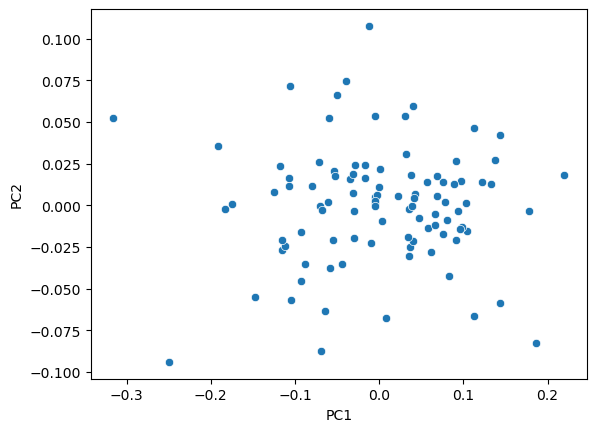

In [16]:
sns.scatterplot(x=0,y=1, data = pd.DataFrame(transformed_B))
plt.xlabel('PC1')
plt.ylabel('PC2')

In [37]:
def pca(A, k):
    # Center the data
    mean = np.mean(A, axis=0)
    # centered_A = A - mean
    centered_A = (A - mean)

    # Compute the covariance matrix
    cov = np.cov(centered_A.T)

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov)

    # Sort the eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select the top k eigenvectors
    principal_components = eigenvectors[:, :k]

    # Transform the data using the principal components
    transformed_A = np.dot(centered_A, principal_components)
    # transformed_A = centered_A.dot(principal_components)

    return transformed_A

In [38]:
bat = pd.read_csv('bat_sample.csv')
B = np.array(bat[['slg_percent','on_base_percent']])
pca(B,2)

array([[-4.71747780e-03,  5.35296463e-02],
       [ 6.11564651e-02, -2.78621447e-02],
       [ 7.78591091e-02,  2.02132370e-03],
       [-6.40716791e-02, -6.36799044e-02],
       [-6.06796942e-02,  2.02012935e-03],
       [-2.93599026e-02, -3.37159178e-03],
       [ 8.32659198e-02, -4.24282702e-02],
       [ 1.85663571e-01, -8.26616025e-02],
       [-1.68653783e-02,  1.63486228e-02],
       [ 2.19747017e-01,  1.79531017e-02],
       [ 3.50985600e-02, -1.92017903e-03],
       [-5.30173374e-03,  5.06668476e-03],
       [-7.13483914e-02,  2.59194787e-02],
       [-1.07547513e-01,  1.16848875e-02],
       [ 3.90180255e-02, -2.96051520e-04],
       [ 6.62595321e-02, -5.08147949e-03],
       [ 1.21832244e-01,  1.41193964e-02],
       [ 7.52101996e-02, -1.74461692e-02],
       [ 3.63041987e-02, -2.51483179e-02],
       [ 9.39485123e-02, -3.55820179e-03],
       [ 9.13424829e-02,  2.67437554e-02],
       [ 4.67271219e-02, -7.81734352e-03],
       [-1.69592805e-02,  2.39638169e-02],
       [-5.

Text(0, 0.5, 'PC2')

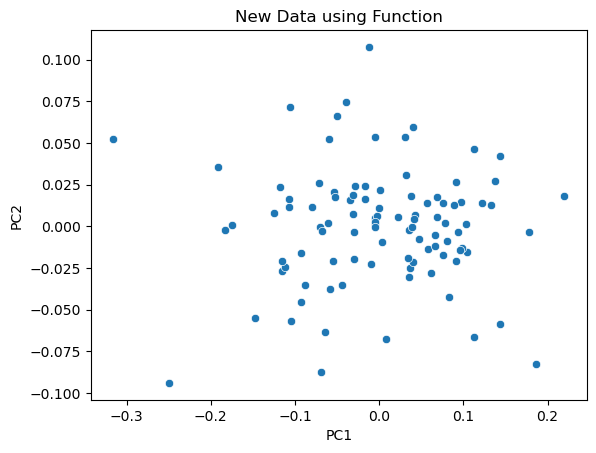

In [39]:
plt.title('New Data using Function')
sns.scatterplot(x=0,y=1, data = pd.DataFrame(pca(B,2)))
plt.xlabel('PC1')
plt.ylabel('PC2')